## Importing the libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

## Reading in the data files

In [2]:
df_calendar = pd.read_csv('/Users/rwalters/Documents/Airbnb Data 2020/calendar.csv')
df_listings = pd.read_csv('/Users/rwalters/Documents/Airbnb Data 2020/listings.csv', dtype='str')
df_reviews = pd.read_csv('/Users/rwalters/Documents/Airbnb Data 2020/reviews.csv')

## Exploring the datasets

### Listings

In [3]:
df_listings.shape

(86358, 106)

In [4]:
# show listings data sample
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20200414180850,2020-04-16,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,...,f,f,moderate,f,f,2,1,1,0,0.18
1,15400,https://www.airbnb.com/rooms/15400,20200414180850,2020-04-16,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,...,t,f,strict_14_with_grace_period,t,t,1,1,0,0,0.71
2,17402,https://www.airbnb.com/rooms/17402,20200414180850,2020-04-15,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"This is a wonderful very popular beautiful, sp...",You'll have a wonderful stay in this superb mo...,none,"Location, location, location! You won't find b...",...,t,f,strict_14_with_grace_period,f,f,15,15,0,0,0.38
3,17506,https://www.airbnb.com/rooms/17506,20200414180850,2020-04-16,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Enjoy a boutique London townhouse bed and brea...,Enjoy a chic stay in this elegant but fully mo...,business,Fulham is 'villagey' and residential – a real ...,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,NaN
4,25023,https://www.airbnb.com/rooms/25023,20200414180850,2020-04-15,All-comforts 2-bed flat near Wimbledon tennis,"Large, all comforts, 2-bed flat; first floor; ...",10 mins walk to Southfields tube and Wimbledon...,"Large, all comforts, 2-bed flat; first floor; ...",none,This is a leafy residential area with excellen...,...,t,f,moderate,f,f,1,1,0,0,0.70


In [5]:
df_listings.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               24
summary                                          4903
space                                           26300
description                                      3035
experiences_offered                                 0
neighborhood_overview                           30684
notes                                           53440
transit                                         31380
access                                          41180
interaction                                     35701
house_rules                                     36825
thumbnail_url                                   86358
medium_url                                      86358
picture_url                                         0
xl_picture_url              

### Reviews

In [6]:
df_reviews.shape

(1513966, 6)

In [7]:
# show reviews data sample
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,13913,80770,2010-08-18,177109,Michael,My girlfriend and I hadn't known Alina before ...
1,13913,367568,2011-07-11,19835707,Mathias,Alina was a really good host. The flat is clea...
2,13913,529579,2011-09-13,1110304,Kristin,Alina is an amazing host. She made me feel rig...
3,13913,595481,2011-10-03,1216358,Camilla,"Alina's place is so nice, the room is big and ..."
4,13913,612947,2011-10-09,490840,Jorik,"Nice location in Islington area, good for shor..."


In [8]:
df_reviews.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         716
dtype: int64

### Calendar

In [9]:
df_calendar.shape

(31522141, 7)

In [10]:
# show calendar data sample
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,140518,2020-04-17,f,$60.00,$60.00,1.0,365.0
1,13913,2020-04-16,f,$49.00,$49.00,1.0,29.0
2,13913,2020-04-17,f,$49.00,$49.00,1.0,29.0
3,13913,2020-04-18,f,$49.00,$49.00,1.0,29.0
4,13913,2020-04-19,t,$49.00,$49.00,1.0,29.0


In [11]:
df_calendar.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

## The business questions

**Question 1**

- What types of holidays are people interested in? 
    - Can a recommendation be created from the reviews?

**Question 2**
- What features assist in obtaining a good review score?

**Question 3**
- Is there a seasonal trend to the availability of accommodation?

In [12]:
df_calendar.isnull().sum()

listing_id           0
date                 0
available            0
price               27
adjusted_price      27
minimum_nights    1060
maximum_nights    1060
dtype: int64

In [13]:
df_calendar = df_calendar.fillna(0)

In [14]:
def change_to_float(df):
    df = df.str.replace(',', '')
    return df.str.replace('$', '').astype('float64')

In [15]:
def change_to_int(df):
    return df.astype('int64')

In [16]:
df_calendar['price'] = change_to_float(df_calendar['price'])
df_calendar['adjusted_price'] = change_to_float(df_calendar['adjusted_price'])

In [17]:
df_calendar['minimum_nights'] = change_to_int(df_calendar['minimum_nights'])
df_calendar['maximum_nights'] = change_to_int(df_calendar['maximum_nights'])

In [18]:
df_calendar['date'] = df_calendar['date'].astype('datetime64[ns]')

In [19]:
df_calendar.dtypes

listing_id                 int64
date              datetime64[ns]
available                 object
price                    float64
adjusted_price           float64
minimum_nights             int64
maximum_nights             int64
dtype: object

In [23]:
df_calendar.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,3.15221e+07,3.15221e+07,3.15221e+07,3.15221e+07,3.15221e+07
mean,2.51152e+07,132.445,132.335,5.21389,611489
std,1.2383e+07,284.947,284.764,27.7877,3.58806e+07
min,13913,0,0,0,0
25%,1.55303e+07,46,45,1,65
50%,2.57336e+07,84,84,2,1125
75%,3.65417e+07,148,147,3,1125
max,4.31868e+07,19985,19985,1125,2.14748e+09


### Preparing the data for displaying

In [24]:
date_count_df = df_calendar.groupby('date').size().reset_index(name='count')

In [25]:
date_count_df.head()

,date,count
0,2020-04-14,5938
1,2020-04-15,29361
2,2020-04-16,47552
3,2020-04-17,64424
4,2020-04-18,75977


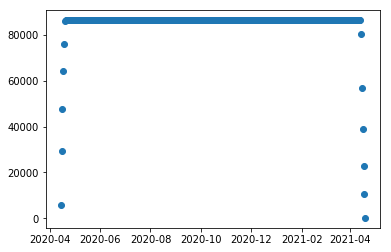

In [26]:
plt.plot_date(date_count_df['date'], date_count_df['count'])
plt.show()

**Question 4**
- What is the average price for the different location? what would affect this price? 

**Question 5**
- What type of accommodation is most popular? i.e. number of rooms availble